In [1]:
from pywaffle import Waffle # PyWaffle Documentation --> https://buildmedia.readthedocs.org/media/pdf/pywaffle/latest/pywaffle.pdf
import matplotlib.pyplot as plt #Matplotlib pyplot to plot the charts
import pandas as pd
import matplotlib as mpl
from highlight_text import ax_text, fig_text

In [2]:
###download data from FBref into Excel and import it###
data = pd.read_csv(r'YOURFILEPATH\BLCreate.csv',encoding="latin-1")

### eine Kopie mache mit den rlevanten Spalten###
data2 = data[['AktivPass','ToterPass','Dribb.','Sc','Gef','Vert.']].copy()

###summe erstellen###
data2['Total'] = data2[['AktivPass','ToterPass','Dribb.','Sc','Gef','Vert.']].sum(axis=1)
data2 = data2.sort_values(by=['Total'],ascending=False)

###nur die beten 9 Spieler auswählen###
data2 = data2[:9]


###Spielernamen kürzen###
data2['Spieler'] = data['Spieler'].str.split('\\', expand=True)[0]

###Transpose dataframe###
###Player und Total löschen, um die Daten fertig fürs visualiseren zu machen###
data2 = data2.T
data2.columns = data2.iloc[7]
data2 = data2.drop('Spieler')
data2 = data2.drop('Total')

###neuen df für die Namen kreiren###
my_list = data2.columns.values.tolist()
data3 = pd.DataFrame(data2,columns=my_list)
data3

,Jadon Sancho,Thomas Müller,Vincenzo Grifo,Angeliño,Matheus Cunha,Dani Olmo,Leon Bailey,Christopher Nkunku,Daichi Kamada
AktivPass,60,80,51,52,32,55,43,31,39
ToterPass,18,1,25,13,17,0,9,22,21
Dribb.,5,2,4,6,9,4,8,5,2
Sc,2,1,4,3,5,10,5,5,2
Gef,2,1,1,2,6,3,6,8,4
Vert.,1,2,1,0,5,1,1,1,2


C:\Users\philipp.hollenhorst\Anaconda3\lib\site-packages\pywaffle\waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")
findfont: Font family ['Andale Mono'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Andale Mono'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Andale Mono'] not found. Falling back to DejaVu Sans.


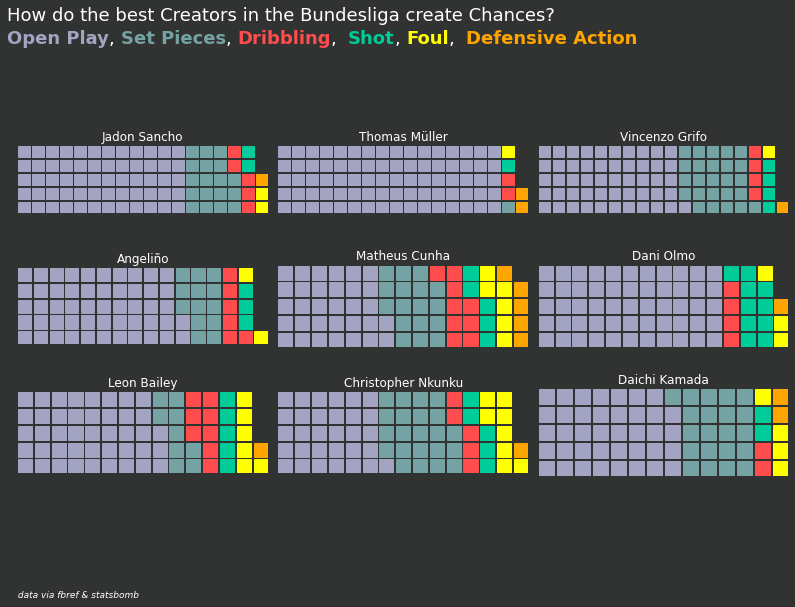

In [3]:
###erstelle the waffle chart. WIr benutzen pyplot.figure() mit der figure class = Waffle

background = "#313332"
text_color = 'w'
primary = 'red'
secondary = 'lightblue'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

fig = plt.figure(
    FigureClass = Waffle,
    plots={
        '331': {                             
            'values': data3.iloc[:,0],
            'title': {
                'label': my_list[0],
                'color': 'white'
            },
            },
        '332': {                             
            'values': data3.iloc[:,1],
            'title': {
                'label': my_list[1],
                'color': 'white'
            },
            },
        '333': {                             
            'values': data3.iloc[:,2],
            'title': {
                'label': my_list[2],
                'color': 'white'
            }
            },
        '334':{                              
            'values': data3.iloc[:,3],
            'title': {
                'label': my_list[3],
                'color': 'white'
            },
            }
        ,
        '335': {                              
            'values': data3.iloc[:,4],
            'title': {
                'label': my_list[4],
                'color': 'white'
            },
            },
        '336': {
            'values': data3.iloc[:,5],                              
            'title': {
                'label': my_list[5],
                'color': 'white'
            },
            },
        '337': {                              
            'values': data3.iloc[:,6],
            'title': {
                'label': my_list[6],
                'color': 'white'
            },
            },
        '338': {                             
            'values': data3.iloc[:,7],
            'title': {
                'label': my_list[7],
                'color': 'white'
                ''
            },
            },
        '339': {
            'values': data3.iloc[:,8],
            'title': {
                'label': my_list[8],
                'color': 'white'
            },
            },
        
    },
    rows=5,
    figsize=(11, 9),
    rounding_rule='floor',
    colors=("#a3a3c2", "#75a3a3", "#ff4d4d",'#00cc99',"yellow","orange"),
    facecolor=background
)




s = "How do the best Creators in the Bundesliga create Chances? \n<Open Play>, <Set Pieces>, <Dribbling>,  <Shot>, <Foul>,  <Defensive Action>"
fig_text(x=0,y=.9,s=s,
            fontfamily='Andale Mono',
            highlight_weights=['bold'],
            fontsize=18,
            color=text_color,
            highlight_colors=["#a3a3c2", "#75a3a3", "#ff4d4d",'#00cc99','yellow','orange'])
fig.patch.set_facecolor(background)
fig.text(.01,0.05," data via fbref & statsbomb",fontstyle='italic',fontsize=9,fontfamily='Andale Mono',color=text_color)


plt.savefig('waffle.png',dpi=300,bbox_inches = 'tight',facecolor=background)